Import

In [29]:
import subprocess
import shlex
import os.path
import sys
import pickle
import datetime
import tweepy
import matplotlib.pyplot as plt 
import numpy as np
from scipy import spatial  
from sklearn.metrics import r2_score
import string
import numpy as np
import matplotlib.pyplot as plt
import collections
from itertools import tee, islice
from sklearn.decomposition import PCA

Other Helper Functions

In [16]:
def get_list_of_users(tweets):

    list_of_user = []

    for tweet in tweets:
        user_id = tweet.user.id
        if user_id not in list_of_user:
            list_of_user.append(user_id)

    return list_of_user

Import Tweet and Related Data

In [ ]:
# Where you want to save the coverted files # TO BE REMOVED
test_directory = "" 

In [7]:
#Location of all the ".p" files containing tweets of friends
directory = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/" 

# Location of sentiment analysis file
sentiment_directory = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/Sentiment/"
analyzed_users = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/data_analyzed_1.p"

In [14]:
# Tweets output from the function, get_inital_tweets
initial_tweet_file = directory + 'user_tweet_large.p'
initial_tweets = pickle.load(open(initial_tweet_file, "rb"))
trending_tweet_file = directory + 'trending_tweets.p'
trending_tweets = pickle.load(open(trending_tweet_file, "rb"))

In [17]:
print(len(trending_tweets))
list_of_users = get_list_of_users(trending_tweets)

740


In [3]:
# Don't use this if using above
already_analyzed = pickle.load(open(analyzed_users, "rb"))
list_of_users = []

for uid in already_analyzed:
    list_of_users.append(uid)

Regression Models - Simple

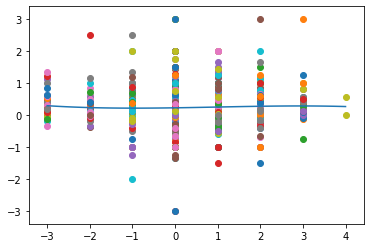

In [15]:
# Plot relationship between tweet sentiment and environment sentiment
    
x_array = []
y_array = []

# Analyze all the  users in initial_tweets, for every tweet, plot the tweet sentiment and the average
# environment sentiment (one value for all post by friends)
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                x_array.append(tweet_sentiment[tweet_id]['combined'])
                y_array.append(tweet_sentiment[tweet_id]['friend'])
                plt.scatter(tweet_sentiment[tweet_id]['combined'], tweet_sentiment[tweet_id]['friend'])
            
# Line of best fit
mymodel = np.poly1d(np.polyfit(x_array, y_array, 3))
myline = np.linspace(-3, 4, 100)
plt.plot(myline, mymodel(myline))

In [ ]:
# Convert into numpy array
x_array = np.array(x_array)
y_array = np.array(y_array)

0.0006149624101606799


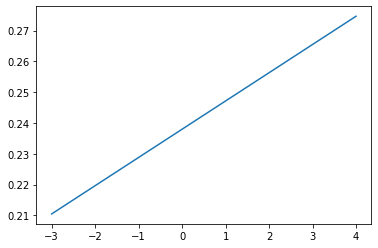

In [34]:
# Linear Model

mymodel = np.poly1d(np.polyfit(x_array, y_array, 1))
myline = np.linspace(-3, 4, 100)
plt.plot(myline, mymodel(myline))

# r^2 score for linear model
print(r2_score(y_array, mymodel(x_array)))

0.001836927014607026


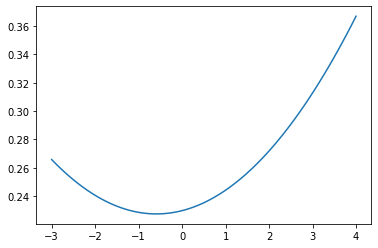

In [35]:
# Polynominal - Degree 2

mymodel_2 = np.poly1d(np.polyfit(x_array, y_array, 2))
plt.plot(myline, mymodel_2(myline))

print(r2_score(y_array, mymodel_2(x_array)))

0.0022702676794761345


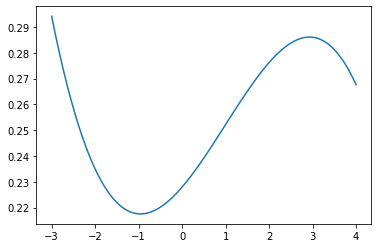

In [36]:
# Polynominal - Degree 3

mymodel_3 = np.poly1d(np.polyfit(x_array, y_array, 3))
plt.plot(myline, mymodel_3(myline))

print(r2_score(y_array, mymodel_3(x_array)))

0.002709947027007664


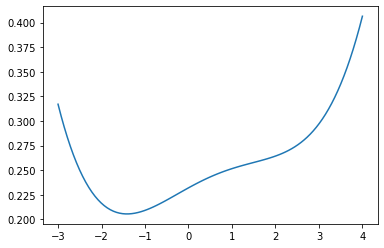

In [37]:
# Polynominal - Degree 4

mymodel_4 = np.poly1d(np.polyfit(x_array, y_array, 4))
plt.plot(myline, mymodel_4(myline))

print(r2_score(y_array, mymodel_4(x_array)))

0.0027106010057169616


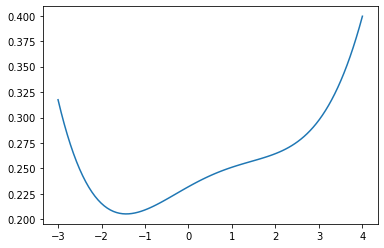

In [38]:
# Polynominal - Degree 5

mymodel_5 = np.poly1d(np.polyfit(x_array, y_array, 5))
plt.plot(myline, mymodel_5(myline))

print(r2_score(y_array, mymodel_5(x_array)))

0.0029745101584667255


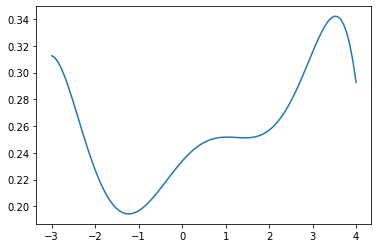

In [39]:
# Polynominal - Degree 6

mymodel_6 = np.poly1d(np.polyfit(x_array, y_array, 6))
plt.plot(myline, mymodel_6(myline))

print(r2_score(y_array, mymodel_6(x_array)))

0.002984909832429161


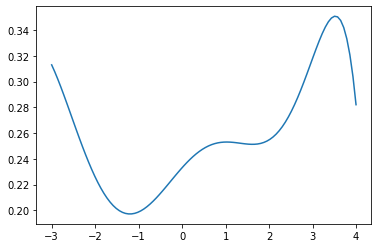

In [40]:
# Polynominal - Degree 7

mymodel_7 = np.poly1d(np.polyfit(x_array, y_array, 7))
plt.plot(myline, mymodel_7(myline))

print(r2_score(y_array, mymodel_7(x_array)))

0.00298490983242905


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


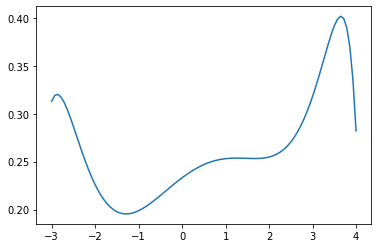

In [49]:
# Polynominal - Degree 20

mymodel_20 = np.poly1d(np.polyfit(x_array, y_array, 20))
plt.plot(myline, mymodel_20(myline))

print(r2_score(y_array, mymodel_20(x_array)))

Predictive Accuracy

PCA Model

In [18]:
# Number of tweets in database
all_tweets = 0

for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        num_of_tweets_user = len(tweet_sentiment)
        all_tweets = all_tweets + num_of_tweets_user

In [20]:
# Number of features
num_of_features = 19
print(all_tweets)
print(num_of_features)

26232
19


In [21]:
# 0 = 0avg, 5 = 5 avg, 6 = -1 avg, 10 = -5 avg
C = []

for i in range(11):
    C.append([])

In [27]:
u_index = 0
# Analyze all the  users in initial_tweets
for user in list_of_users:
    print("Analyzing user " + str(u_index))
    u_index += 1
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            # 0-0avg, 5 = 5avg, 6=pos_1, 10=pos_5, 11=neg_1, 15=neg_5, 16=pos, 17=neg, 18=neu
            values = np.zeros(num_of_features)
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']

            if 'friend' in tweet_sentiment[tweet_id]:
                for tweet in tweet_sentiment[tweet_id]['friend']:
                    
                    friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                    values[friend_sentiment] += 1
                    if friend_sentiment > 0:
                        values[16] += 1
                    elif friend_sentiment < 0:
                        values[17] += 1
                    else:
                        values[18] += 1
                        
                    friend_separate = tweet_sentiment[tweet_id]['friend'][tweet]
                    friend_separe_positive = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][0]
                    values[5 + friend_separe_positive] += 1
                    friend_separe_negative = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][1]
                    values[10 + abs(friend_separe_negative)] += 1
                            
                total = values[16] + values[17] + values[18]
                
                if total > 0:
                    values[16] = values[16]/total
                    values[17] = values[17]/total
                    values[18] = values[18]/total
                    
                    if 5 >= tweet_sent >= 0:
                        C[tweet_sent].append(values)
                    else:
                        C[5 + abs(tweet_sent)].append(values)
                        
flat_c = []
size = []

# Convert into array such that row = num of tweets and column = features
for l in C:
    size.append(len(l))
    for item in l:
        flat_c.append(item)


Analyzing user 0
Analyzing user 1
Analyzing user 2
Analyzing user 3
Analyzing user 4
Analyzing user 5
Analyzing user 6
Analyzing user 7
Analyzing user 8
Analyzing user 9
Analyzing user 10
Analyzing user 11
Analyzing user 12
Analyzing user 13
Analyzing user 14
Analyzing user 15
Analyzing user 16
Analyzing user 17
Analyzing user 18
Analyzing user 19
Analyzing user 20
Analyzing user 21
Analyzing user 22
Analyzing user 23
Analyzing user 24
Analyzing user 25
Analyzing user 26
Analyzing user 27
Analyzing user 28
Analyzing user 29
Analyzing user 30
Analyzing user 31
Analyzing user 32
Analyzing user 33
Analyzing user 34
Analyzing user 35
Analyzing user 36
Analyzing user 37
Analyzing user 38
Analyzing user 39
Analyzing user 40
Analyzing user 41
Analyzing user 42
Analyzing user 43
Analyzing user 44
Analyzing user 45
Analyzing user 46
Analyzing user 47
Analyzing user 48
Analyzing user 49
Analyzing user 50
Analyzing user 51
Analyzing user 52
Analyzing user 53
Analyzing user 54
Analyzing user 55
An

[[ -94.00389316  -28.21951265]
 [ -26.21070616  -36.47994533]
 [ -27.04668845  -36.12338859]
 ...
 [-135.29731078  -47.48761691]
 [-142.81453679  -43.34687541]
 [-122.77929564  -55.56869986]]


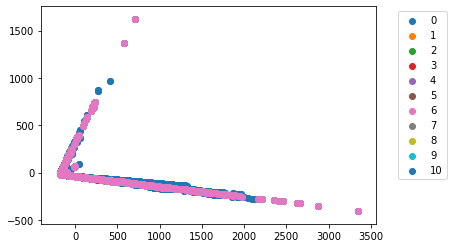

In [30]:
# Specify number of component to keep
pca = PCA(n_components=2)
# Fit the model with the matrix flat_C, where row = samples, column = feature
pca.fit(flat_c)
# Apply dimensionality reduction on matrix flat_c, which return row = samples, columns = components (PC1 (most variation), PC2)
C_pca = pca.transform(flat_c)

print(C_pca)

for i in range(len(size)):
    if i != 0:
        plt.scatter(C_pca[size[i - 1]:size[i]+1, 0], C_pca[size[i - 1]:size[i]+1, 1], label=str(i))
    else:
        plt.scatter(C_pca[0:size[i]+1, 0], C_pca[0:size[i]+1, 1], label=str(i))
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

PCA (Old Model)

[[-2.09337695e+04 -9.59016528e+01]
 [-2.09337695e+04 -9.59016528e+01]
 [-1.44048874e+04 -5.28311182e+01]
 [-3.93687994e+03 -2.82097769e+01]
 [-3.48559366e+01 -1.35300322e+00]
 [ 9.19316030e+04 -3.02651489e+02]
 [ 2.52212259e+04  6.67479048e+02]
 [ 1.77711932e+03  2.04905361e+02]
 [-1.68405569e+04 -1.09328453e+02]
 [-2.09114595e+04 -9.03056107e+01]
 [-2.09337695e+04 -9.59016528e+01]]


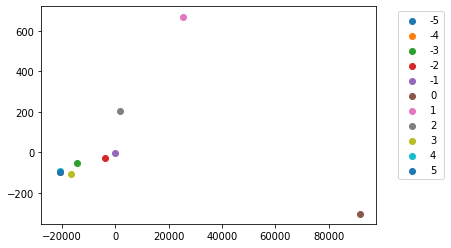

In [44]:
import string
import numpy as np
import matplotlib.pyplot as plt
import collections
from itertools import tee, islice
from sklearn.decomposition import PCA

scale = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]
overall = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
excluded = [0, 1]

C = np.zeros((11, 11))

# Analyze all the  users in initial_tweets
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            tweet_sent_index = overall.index(tweet_sentiment[tweet_id]['combined'])
            
            if 'friend' in tweet_sentiment[tweet_id]:
                for tweet in tweet_sentiment[tweet_id]['friend']:
                    friend_index = overall.index(tweet_sentiment[tweet_id]['friend'][tweet]['combined'])
                    C[tweet_sent_index][friend_index] += 1
                    
# Specify number of component to keep
pca = PCA(n_components=2)
# Fit the model with the matrix C, where row = samples, column = feature
pca.fit(C)
# Apply dimensionality reduction on matrix c, which return row = samples, columns = components (PC1 (most variation), PC2)
C_pca = pca.transform(C)

print(C_pca)

for i in range(len(overall)):
    plt.scatter(C_pca[i:i+1, 0], C_pca[i:i+1, 1], label=overall[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

3D Plot

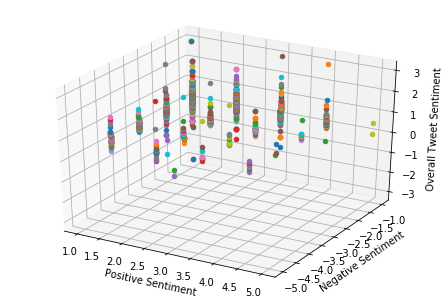

In [12]:
from mpl_toolkits.mplot3d import Axes3D

x_1 = []
y_1 = []
z_1 = []

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("Positive Sentiment")
ax.set_ylabel("Negative Sentiment")
ax.set_zlabel("Overall Tweet Sentiment")

# Analyze all the  users in initial_tweets
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                x_temp = tweet_sentiment[tweet_id]['sentiment'][0]
                y_temp = tweet_sentiment[tweet_id]['sentiment'][1]
                x_1.append(x_temp)
                y_1.append(y_temp)
                z_1.append(tweet_sentiment[tweet_id]['friend'])
                ax.scatter(x_temp, y_temp, tweet_sentiment[tweet_id]['friend'])
            
x_1 = np.array(x_1)
y_1 = np.array(y_1)
z_1 = np.array(z_1)

Relation between Tweet and Environment

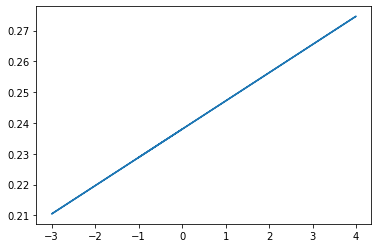

In [9]:
m, b = np.polyfit(x_array, y_array, 1)
plt.plot(x_array, m*x_array + b)

In [41]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x_array, y_array)
print(r)

0.024798435639383963


PCA 1D

[[-5756.72921788]
 [-5756.72921788]
 [-2617.01541367]
 [ 2142.65656737]
 [ 6181.54030341]
 [-5756.72921788]
 [19480.635701  ]
 [ 7449.84244472]
 [-3868.1826734 ]
 [-5742.56005792]
 [-5756.72921788]]


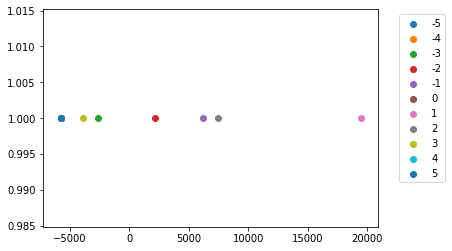

In [84]:
import string
import numpy as np
import matplotlib.pyplot as plt
import collections
from itertools import tee, islice
from sklearn.decomposition import PCA

scale = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]
overall = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
excluded = [0]

C = np.zeros((11, 11))

# Analyze all the  users in initial_tweets
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            
            if tweet_sentiment[tweet_id]['combined'] not in excluded:
                tweet_sent_index = overall.index(tweet_sentiment[tweet_id]['combined'])

                if 'friend' in tweet_sentiment[tweet_id]:
                    for tweet in tweet_sentiment[tweet_id]['friend']:
                        if tweet_sentiment[tweet_id]['friend'][tweet]['combined'] not in excluded:
                            friend_index = overall.index(tweet_sentiment[tweet_id]['friend'][tweet]['combined'])
                            C[tweet_sent_index][friend_index] += 1
                    
# Specify number of component to keep
pca = PCA(n_components=1)
# Fit the model with the matrix C, where row = samples, column = feature
pca.fit(C)
# Apply dimensionality reduction on matrix c, which return row = samples, columns = components (PC1 (most variation), PC2)
C_pca = pca.transform(C)

print(C_pca)

for i in range(len(overall)):
    plt.scatter(C_pca[i:i+1, 0], 1, label=overall[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Prototype and Exemplar Models - Helper Functions

In [33]:
# Based on code from COG260
# Helper method for similarity function
def similarity_function(feature_vector_0, feature_vector_1):
    euclidean_distance = spatial.distance.euclidean(feature_vector_0, feature_vector_1)
    temp_calc = euclidean_distance**2
    similarity = np.exp(0 - temp_calc)
    return similarity
    
    
# Helper method for examplar model
def categorize_with_exemplar(test_data_point, category_0, category_1, category_2):
    
    similarity_sum_cateogry_0 = []
    similarity_sum_cateogry_1 = []
    similarity_sum_cateogry_2 = []
    
    for object_0 in category_0:
        similarity_sum_cateogry_0.append(similarity_function(object_0, test_data_point))
        
    for object_1 in category_1:
        similarity_sum_cateogry_1.append(similarity_function(object_1, test_data_point))
        
    for object_2 in category_2:
        similarity_sum_cateogry_2.append(similarity_function(object_2, test_data_point))
        
    similarity_sum_cateogry_0 = np.sum(similarity_sum_cateogry_0)
    similarity_sum_cateogry_1 = np.sum(similarity_sum_cateogry_1)
    similarity_sum_cateogry_2 = np.sum(similarity_sum_cateogry_2)
    
    similarity_0 = similarity_sum_cateogry_0 / len(category_0)
    similarity_1 = similarity_sum_cateogry_1 / len(category_1)
    similarity_2 = similarity_sum_cateogry_2 / len(category_2)
    
    combined = [similarity_0, similarity_1, similarity_2]
    return_value = combined.index(max(combined))
    #print(combined)
    #print(return_value)
    
    return return_value

def categorize_with_2_exemplar(test_data_point, category_0, category_1):
    
    similarity_sum_cateogry_0 = []
    similarity_sum_cateogry_1 = []
    
    for object_0 in category_0:
        similarity_sum_cateogry_0.append(similarity_function(object_0, test_data_point))
        
    for object_1 in category_1:
        similarity_sum_cateogry_1.append(similarity_function(object_1, test_data_point))
        
    similarity_sum_cateogry_0 = np.sum(similarity_sum_cateogry_0)
    similarity_sum_cateogry_1 = np.sum(similarity_sum_cateogry_1)
    
    similarity_0 = similarity_sum_cateogry_0 / len(category_0)
    similarity_1 = similarity_sum_cateogry_1 / len(category_1)

    combined = [similarity_0, similarity_1]
    return_value = combined.index(max(combined))
    
    return return_value

In [34]:
# Helper method to get the prototype
def get_prototype(data_point):
        
    prototype = []
        
    for i in range(len(data_point[0, :])):
        prototype.append(np.mean(data_point[:,i]))
            
    return prototype

def categorize_with_prototype(test_data_point, category_0, category_1, category_2):
    
    cat_0_distance = spatial.distance.euclidean(test_data_point, category_0)
    cat_1_distance = spatial.distance.euclidean(test_data_point, category_1)
    cat_2_distance = spatial.distance.euclidean(test_data_point, category_2)
    
    combined = [cat_0_distance, cat_1_distance, cat_2_distance]
    return_value = combined.index(min(combined))
    
    return return_value

def categorize_with_2_prototype(test_data_point, category_0, category_1):
    
    cat_0_distance = spatial.distance.euclidean(test_data_point, category_0)
    cat_1_distance = spatial.distance.euclidean(test_data_point, category_1)
    
    combined = [cat_0_distance, cat_1_distance]
    return_value = combined.index(min(combined))
    
    return return_value

Prototype and Exemplar Model - Model Prep

In [61]:
sentiment_directory = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/Sentiment/"
analyzed_users = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/data_analyzed_1.p"
analyzed_users = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/data_analyzed_1.p"

positive_x = []
positive_y = []
positive_z = []

negative_x = []
negative_y = []
negative_z = []

neutral_x = []
neutral_y = []
neutral_z = []

positive_data_point = []
negative_data_point = []
neutral_data_point = []

already_analyzed = pickle.load(open(analyzed_users, "rb"))
list_of_users = []

for uid in already_analyzed:
    list_of_users.append(uid)

# Analyze all the  users in initial_tweets
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            positive = 0
            negative = 0
            neutral = 0
            contain_pos = 0
            contain_neg = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']

            if 'friend' in tweet_sentiment[tweet_id]:
                for tweet in tweet_sentiment[tweet_id]['friend']:
                    friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                    
                    if friend_sentiment > 0:
                        positive += 1
                    elif friend_sentiment < 0:
                        negative += 1
                    else:
                        neutral += 1
                        
                    friend_sentiment_pos = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][0]
                    friend_sentiment_neg = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][1]
                    
                    if friend_sentiment_pos > 2:
                        contain_pos += 1
                        
                    if friend_sentiment_neg < -1:
                        contain_pos += 1
                            
                total = positive + negative + neutral
                
                if total > 0:
                    positive_percent = positive/total
                    negative_percent = negative/total
                    neutral_percent = neutral/total
                    
                    cont_pos_percent = contain_pos/total
                    cont_neg_percent = contain_neg/total
                    
                    temp = [positive_percent, negative_percent, neutral_percent, cont_pos_percent, cont_neg_percent]
                    temp = np.asarray(temp)

                    if tweet_sent > 0:
                        positive_x.append(positive_percent)
                        positive_y.append(negative_percent)
                        positive_z.append(neutral_percent)

                        positive_data_point.append(temp)
                    elif tweet_sent < 0:
                        negative_x.append(positive_percent)
                        negative_y.append(negative_percent)
                        negative_z.append(neutral_percent) 

                        negative_data_point.append(temp)
                    else:
                        neutral_x.append(positive_percent)
                        neutral_y.append(negative_percent)
                        neutral_z.append(neutral_percent)  

                        neutral_data_point.append(temp)

positive_data_point = np.asarray(positive_data_point)
negative_data_point = np.asarray(negative_data_point)
neutral_data_point = np.asarray(neutral_data_point)

Prototype Model

In [69]:
# Get Prototype

positive_prototype = get_prototype(positive_data_point)
negative_prototype = get_prototype(negative_data_point)
neutral_prototype = get_prototype(neutral_data_point)

In [37]:
# Prep for Testing Model
result = {}

NZ_tweet_dir = predictive_model = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Partner Code/"
predictive_model = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Partner Code/Sentiment/"

#tweet_file_name = predictive_model  + 'user_tweet_large_NZ_1.p'
#predictive_user_tweets = pickle.load(open(tweet_file_name, "rb"))

trending_tweet_file_NZ = NZ_tweet_dir + 'trending_tweets_NZ.p'
trending_tweets_NZ = pickle.load(open(trending_tweet_file_NZ, "rb"))

list_of_users_NZ = get_list_of_users(trending_tweets_NZ)

analyzed_users_NZ = predictive_model  + 'data_analyzed_1.p'
already_analyzed_NZ = pickle.load(open(analyzed_users_NZ, "rb"))

for uid in already_analyzed_NZ:
    if uid not in list_of_users_NZ:
        list_of_users_NZ.append(uid)
        
print(len(list_of_users_NZ))

191


In [67]:
# Prototype - only positive and negative

total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0

p_miss = 0
n_miss = 0
    
# Analyze all the  users in initial_tweets
for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            contain_pos = 0
            contain_neg = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']
            
            if tweet_sent != 0:

                if 'friend' in tweet_sentiment[tweet_id]:
                    for tweet in tweet_sentiment[tweet_id]['friend']:

                        friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                        if friend_sentiment > 0:
                            positive += 1
                        elif friend_sentiment < 0:
                            negative += 1
                        else:
                            neutral += 1
                            
                        friend_sentiment_pos = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][0]
                        friend_sentiment_neg = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][1]
                    
                        if friend_sentiment_pos > 2:
                            contain_pos += 1
                        
                        if friend_sentiment_neg < -1:
                            contain_pos += 1
                            

                total = positive + negative + neutral
                if total > 0:
                    positve_percent = positive/total
                    negative_percent = negative/total
                    neutral_percent = neutral/total
                    
                    cont_pos_percent = contain_pos/total
                    cont_neg_percent = contain_neg/total
                    
                    temp = [positive_percent, negative_percent, neutral_percent, cont_pos_percent, cont_neg_percent]
                    temp = np.asarray(temp)

                    exemplar = categorize_with_2_prototype(temp, positive_prototype, negative_prototype) 
                    total_count += 1
                    
                    if exemplar == 0:
                        pos_total += 1
                        
                    if exemplar == 1:
                        neg_total += 1

                    if tweet_sent > 0:
                        p_total += 1
                        if exemplar == 0:
                            accurate += 1
                            p_acc += 1
                        else:
                            p_miss += 1
                    elif tweet_sent < 0:
                        n_total += 1
                        if exemplar == 1:
                            accurate += 1
                            n_acc += 1
                        else:
                            n_miss += 1

In [68]:
# Result for Prototype Model
print("Total Accurate " + str(accurate))
print("Total Count " + str(total_count))
print("Positive Percent Predicted " + str(p_acc/p_total))
print("Negative Percevent Predicted " + str(n_acc/n_total))
print("True Positive: " + str(p_acc/pos_total))
print("False Positive: " + str((pos_total - p_acc)/pos_total))
print("Missed Positive: " + str(p_miss))
print("True Negative: " + str(n_acc/neg_total))
print("False Negative: " + str((neg_total - n_acc)/neg_total))
print("Missed Negative: " + str(n_miss))
#print(ne_acc/ne_total)
#print(accurate/total_count)

Total Accurate 1599
Total Count 2056
Positive Percent Predicted 0.6358565737051792
Negative Percevent Predicted 1.0
True Positive: 1.0
False Positive: 0.0
Missed Positive: 457
True Negative: 0.636724960254372
False Negative: 0.36327503974562797
Missed Negative: 0


In [73]:
# Prototype

total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0
neu_total = 0

p_miss = 0
n_miss = 0
ne_miss = 0
    
# Analyze all the  users in initial_tweets
for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            contain_pos = 0
            contain_neg = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']
            

            if 'friend' in tweet_sentiment[tweet_id]:
                for tweet in tweet_sentiment[tweet_id]['friend']:

                    friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                    if friend_sentiment > 0:
                        positive += 1
                    elif friend_sentiment < 0:
                        negative += 1
                    else:
                        neutral += 1
                            
                    friend_sentiment_pos = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][0]
                    friend_sentiment_neg = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][1]
                    
                    if friend_sentiment_pos > 2:
                        contain_pos += 1
                        
                    if friend_sentiment_neg < -1:
                        contain_pos += 1
                            

            total = positive + negative + neutral
            if total > 0:
                positve_percent = positive/total
                negative_percent = negative/total
                neutral_percent = neutral/total
                    
                cont_pos_percent = contain_pos/total
                cont_neg_percent = contain_neg/total
                    
                temp = [positive_percent, negative_percent, neutral_percent, cont_pos_percent, cont_neg_percent]
                temp = np.asarray(temp)

                exemplar = categorize_with_prototype(temp, positive_prototype, negative_prototype, neutral_prototype) 
                total_count += 1
                    
                if exemplar == 0:
                    pos_total += 1
                        
                if exemplar == 1:
                    neg_total += 1
                    
                if exemplar == 2:
                    neu_total += 1

                    if tweet_sent > 0:
                        p_total += 1
                        if exemplar == 0:
                            accurate += 1
                            p_acc += 1
                        else:
                            p_miss += 1
                    elif tweet_sent < 0:
                        n_total += 1
                        if exemplar == 1:
                            accurate += 1
                            n_acc += 1
                        else:
                            n_miss += 1
                    else:
                        ne_total += 1
                        if exemplar == 2:
                            accurate += 1
                            ne_acc += 1
                        else:
                            ne_miss += 1

In [74]:
# Result for Prototype Model
print("Total Accurate " + str(accurate))
print("Total Count " + str(total_count))
print("Positive Percent Predicted " + str(p_acc/p_total))
print("Negative Percevent Predicted " + str(n_acc/n_total))
print("Neutral Percevent Predicted " + str(ne_acc/ne_total))
print("True Positive: " + str(p_acc/pos_total))
print("False Positive: " + str((pos_total - p_acc)/pos_total))
print("Missed Positive: " + str(p_miss))
print("True Negative: " + str(n_acc/neg_total))
print("False Negative: " + str((neg_total - n_acc)/neg_total))
print("Missed Negative: " + str(n_miss))
print("True Neutral: " + str(ne_acc/neu_total))
print("False Neutral: " + str((neu_total - ne_acc)/neu_total))
print("Missed Neutral: " + str(ne_miss))
#print(ne_acc/ne_total)
#print(accurate/total_count)

Total Accurate 1702
Total Count 4002


ZeroDivisionError: division by zero

Exemplar Model

In [65]:
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0
    
# Analyze all the  users in initial_tweets
for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            contain_pos = 0
            contain_neg = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']
            
            if tweet_sent != 0:

                if 'friend' in tweet_sentiment[tweet_id]:
                    for tweet in tweet_sentiment[tweet_id]['friend']:

                        friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                        if friend_sentiment > 0:
                            positive += 1
                        elif friend_sentiment < 0:
                            negative += 1
                        else:
                            neutral += 1
                            
                        friend_sentiment_pos = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][0]
                        friend_sentiment_neg = tweet_sentiment[tweet_id]['friend'][tweet]['sentiment'][1]
                    
                        if friend_sentiment_pos > 2:
                            contain_pos += 1
                        
                        if friend_sentiment_neg < -1:
                            contain_pos += 1
                            

                total = positive + negative + neutral
                if total > 0:
                    positve_percent = positive/total
                    negative_percent = negative/total
                    neutral_percent = neutral/total
                    
                    cont_pos_percent = contain_pos/total
                    cont_neg_percent = contain_neg/total
                    
                    temp = [positive_percent, negative_percent, neutral_percent, cont_pos_percent, cont_neg_percent]
                    temp = np.asarray(temp)

                    exemplar = categorize_with_2_exemplar(temp, positive_data_point, negative_data_point) 
                    total_count += 1
                    
                    if exemplar == 0:
                        pos_total += 1
                        
                    if exemplar == 1:
                        neg_total += 1

                    if tweet_sent > 0:
                        p_total += 1
                        if exemplar == 0:
                            accurate += 1
                            p_acc += 1
                    elif tweet_sent < 0:
                        n_total += 1
                        if exemplar == 1:
                            accurate += 1
                            n_acc += 1

In [66]:
# Result for Examplar Model
print("Total Accurate " + str(accurate))
print("Total Count " + str(total_count))
print("Positive Percent Predicted " + str(p_acc/p_total))
print("Negative Percevent Predicted " + str(n_acc/n_total))
print("True Positive: " + str(p_acc/pos_total))
print("False Positive: " + str((pos_total - p_acc)/pos_total))
print("Missed Positive: " + str(p_miss))
print("True Negative: " + str(n_acc/neg_total))
print("False Negative: " + str((neg_total - n_acc)/neg_total))
print("Missed Negative: " + str(n_miss))
#print(ne_acc/ne_total)
#print(accurate/total_count)

Total Accurate 1599
Total Count 2056
Positive Percent Predicted 0.6358565737051792
Negative Percevent Predicted 1.0
True Positive: 1.0
False Positive: 0.0
Missed Positive: 457
True Negative: 0.636724960254372
False Negative: 0.36327503974562797
Missed Negative: 0


Old Exmplar and Prototype Model

In [5]:
sentiment_directory = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/Sentiment/"
analyzed_users = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/data_analyzed_1.p"
analyzed_users = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/data_analyzed_1.p"

positive_x = []
positive_y = []
positive_z = []

negative_x = []
negative_y = []
negative_z = []

neutral_x = []
neutral_y = []
neutral_z = []

positive_data_point = []
negative_data_point = []
neutral_data_point = []

already_analyzed = pickle.load(open(analyzed_users, "rb"))
list_of_users = []

for uid in already_analyzed:
    list_of_users.append(uid)

# Analyze all the  users in initial_tweets
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            positive = 0
            negative = 0
            neutral = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']

            if 'friend' in tweet_sentiment[tweet_id]:
                for tweet in tweet_sentiment[tweet_id]['friend']:
                    friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                    if friend_sentiment > 0:
                        positive += 1
                    elif friend_sentiment < 0:
                        negative += 1
                    else:
                        neutral += 1
                            
                total = positive + negative + neutral
                
                if total > 0:
                    positive_percent = positive/total
                    negative_percent = negative/total
                    neutral_percent = neutral/total
                    temp = [positive_percent, negative_percent, neutral_percent]
                    temp = np.asarray(temp)

                    if tweet_sent > 0:
                        positive_x.append(positive_percent)
                        positive_y.append(negative_percent)
                        positive_z.append(neutral_percent)

                        positive_data_point.append(temp)
                    elif tweet_sent < 0:
                        negative_x.append(positive_percent)
                        negative_y.append(negative_percent)
                        negative_z.append(neutral_percent) 

                        negative_data_point.append(temp)
                    else:
                        neutral_x.append(positive_percent)
                        neutral_y.append(negative_percent)
                        neutral_z.append(neutral_percent)  

                        neutral_data_point.append(temp)

positive_data_point = np.asarray(positive_data_point)
negative_data_point = np.asarray(negative_data_point)
neutral_data_point = np.asarray(neutral_data_point)

In [33]:
print(len(positive_data_point))
print(len(negative_data_point))
print(len(neutral_data_point))
print(len(list_of_users))

print(positive_data_point[0])
print(negative_data_point[0])
print(neutral_data_point[0])

449
285
3354
48
[0.05333333 0.1559633  0.79816514]
[0.05333333 0.09090909 0.85714286]
[0.05333333 0.14666667 0.8       ]


In [52]:
positive_data_point = np.asarray(positive_data_point)
negative_data_point = np.asarray(negative_data_point)

positive_prototype = get_prototype(positive_data_point)
negative_prototype = get_prototype(negative_data_point)
#neutral_prototype = get_prototype(neutral_data_point)

In [24]:
result = {}

predictive_model = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Partner Code/Sentiment/"
tweet_file_name = predictive_model  + 'user_tweet_large_NZ_1.p'
predictive_user_tweets = pickle.load(open(tweet_file_name, "rb"))

analyzed_users_NZ = predictive_model  + 'data_analyzed_1.p'
already_analyzed_NZ = pickle.load(open(analyzed_users_NZ, "rb"))
list_of_users_NZ = []

for uid in already_analyzed_NZ:
    list_of_users_NZ.append(uid)

In [61]:
result = {}

predictive_model = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Partner Code/Sentiment/"
tweet_file_name = predictive_model  + 'user_tweet_large_NZ_1.p'
predictive_user_tweets = pickle.load(open(tweet_file_name, "rb"))

analyzed_users_NZ = predictive_model  + 'data_analyzed_1.p'
already_analyzed_NZ = pickle.load(open(analyzed_users_NZ, "rb"))
list_of_users_NZ = []

for uid in already_analyzed_NZ:
    list_of_users_NZ.append(uid)

total_count = 0
accurate = 0
    
# Analyze all the  users in initial_tweets
for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']

            if 'friend' in tweet_sentiment[tweet_id]:
                for tweet in tweet_sentiment[tweet_id]['friend']:
                        
                    friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                    if friend_sentiment > 0:
                        positive += 1
                    elif friend_sentiment < 0:
                        negative += 1
                    else:
                        neutral += 1
                            
            total = positive + negative + neutral
            if total > 0:
                positve_percent = positive/total
                negative_percent = negative/total
                neutral_percent = neutral/total
                temp = [positve_percent, negative_percent, neutral_percent]
                temp = np.asarray(temp)

                exemplar = categorize_with_exemplar(temp, positive_data_point, negative_data_point, neutral_data_point)
                total_count += 1
                
                '''

                if 1 >= tweet_sent >= -1:
                    if exemplar == 2:
                        accurate += 1
                else:
                    if exemplar != 2:
                        accurate += 1
                '''
                        
                        
                if tweet_sent > 0:
                    if exemplar == 0:
                        accurate += 1
                elif tweet_sent < 0:
                    if exemplar == 1:
                        accurate += 1
                else:
                    if exemplar == 2:
                        accurate += 1
                        

In [27]:
# When tweet_sent is the same as model
print(accurate)
print(total_count)
print(accurate/total_count)

98
1550
0.06322580645161291


In [29]:
# when tweet_sent is different from
print(accurate)
print(total_count)
print(accurate/total_count)

28
1550
0.01806451612903226


In [40]:
# when just predicting neutral from others
print(accurate)
print(total_count)
print(accurate/total_count)

232
1550
0.14967741935483872


In [64]:
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0
    
# Analyze all the  users in initial_tweets
for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']

            if 'friend' in tweet_sentiment[tweet_id]:
                for tweet in tweet_sentiment[tweet_id]['friend']:
                        
                    friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                    if friend_sentiment > 0:
                        positive += 1
                    elif friend_sentiment < 0:
                        negative += 1
                    else:
                        neutral += 1
                            
            total = positive + negative + neutral
            if total > 0:
                positve_percent = positive/total
                negative_percent = negative/total
                neutral_percent = neutral/total
                temp = [positve_percent, negative_percent, neutral_percent]
                temp = np.asarray(temp)

                exemplar = categorize_with_2_prototype(temp, positive_prototype, negative_prototype)#categorize_with_prototype(temp, positive_prototype, negative_prototype, neutral_prototype)
                total_count += 1
                
                ''' 
                if 1 >= tweet_sent >= -1:
                    if exemplar == 2:
                        accurate += 1
                else:
                    if exemplar != 2:
                        accurate += 1
                '''
                        
                        
                if tweet_sent > 0:
                    p_total += 1
                    if exemplar == 0:
                        accurate += 1
                        p_acc += 1
                elif tweet_sent < 0:
                    n_total += 1
                    if exemplar == 1:
                        accurate += 1
                        n_acc += 1
                else:
                    ne_total += 1
                    if exemplar == 2:
                        accurate += 1
                        ne_acc += 1
                        

In [48]:
# when just predicting neutral from others for prototype
print(accurate)
print(total_count)
print(accurate/total_count)

293
1550
0.18903225806451612


In [51]:
# when just predicting neutral from others for prototype
print(accurate)
print(total_count)
print(accurate/total_count)

185
1550
0.11935483870967742


In [56]:
# when just predicting neutral from others for prototype when sent=2, -2
print(accurate)
print(total_count)
print(accurate/total_count)

150
1550
0.0967741935483871


In [60]:
# when just predicting neutral from others for prototype when sent=0, 0, prototype
print(accurate)
print(total_count)
print(accurate/total_count)

644
1550
0.4154838709677419


In [62]:
# when just predicting neutral from others for prototype when sent=0, 0, exemplar
print(accurate)
print(total_count)
print(accurate/total_count)

363
1550
0.23419354838709677


In [66]:
# when just predicting neutral from others for prototype when sent=0, 0, prototype
print(accurate)
print(total_count)
print(p_acc/p_total)
print(n_acc/n_total)
print(ne_acc/ne_total)
print(accurate/total_count)

644
1550
0.412
0.1624548736462094
0.5084087968952135
0.4154838709677419


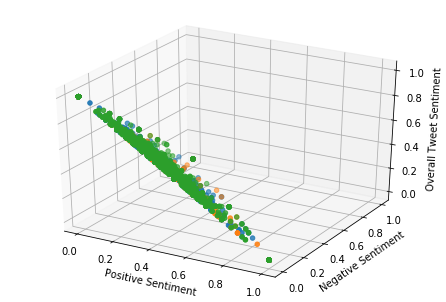

In [67]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("Positive Sentiment")
ax.set_ylabel("Negative Sentiment")
ax.set_zlabel("Neutral Tweet Sentiment")

ax.scatter(positive_x, positive_y, positive_z, label='postive')
ax.scatter(negative_x, negative_y, negative_z, label='negative')
ax.scatter(neutral_x, neutral_y, neutral_z, label='neutral')

In [46]:
from sklearn import svm

positive_label = np.zeros(len(positive_data_point))
negative_label = np.ones(len(negative_data_point))
neutral_label = np.zeros(len(neutral_data_point))

for i in range(len(neutral_label)):
    neutral_label[i] = 2

positive_label = positive_label.tolist()
negative_label = negative_label.tolist()
neutral_label = neutral_label.tolist()

all_labels = positive_label + negative_label #+ neutral_label
all_labels = np.asarray(all_labels)


'''
positive_data_point = positive_data_point.tolist()
negative_data_point = negative_data_point.tolist()
neutral_data_point = neutral_data_point.tolist()
'''

all_points = positive_data_point + negative_data_point #+ neutral_data_point
all_points = np.asarray(all_points)
print(all_points)

clf = svm.SVC() #svm.NuSVC(gamma='auto') #kernel='poly', probability=True
clf.fit(all_points, all_labels)
tech = clf.predict([[0.2, 0.3, 0.5]])
print(int(tech[0]))

[[0.23611111 0.27777778 0.48611111]
 [0.22018349 0.29357798 0.48623853]
 [0.27350427 0.31623932 0.41025641]
 ...
 [0.35416667 0.13541667 0.51041667]
 [0.33333333 0.13131313 0.53535354]
 [0.32653061 0.10204082 0.57142857]]
0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']
            
            if tweet_sent != 0:

                if 'friend' in tweet_sentiment[tweet_id]:
                    for tweet in tweet_sentiment[tweet_id]['friend']:

                        friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                        if friend_sentiment > 0:
                            positive += 1
                        elif friend_sentiment < 0:
                            negative += 1
                        else:
                            neutral += 1

                total = positive + negative + neutral
                if total > 0:
                    positve_percent = positive/total
                    negative_percent = negative/total
                    neutral_percent = neutral/total
                    temp = [positve_percent, negative_percent, neutral_percent]
                    temp = np.asarray(temp)

                    exemplar = int(clf.predict([temp])[0])
                    total_count += 1

                    if tweet_sent > 0:
                        p_total += 1
                        if exemplar == 0:
                            accurate += 1
                            p_acc += 1
                    elif tweet_sent < 0:
                        n_total += 1
                        if exemplar == 1:
                            accurate += 1
                            n_acc += 1
                    else:
                        ne_total += 1
                        if exemplar == 2:
                            accurate += 1
                            ne_acc += 1

In [48]:
# when just predicting neutral from others for prototype when sent=0, 0, svm
print(accurate)
print(total_count)
print(p_acc/p_total)
print(n_acc/n_total)
#print(ne_acc/ne_total)
print(accurate/total_count)

500
777
1.0
0.0
0.6435006435006435


In [59]:
# 2 Prototype

total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0
    
# Analyze all the  users in initial_tweets
for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']
            
            if tweet_sent != 0:

                if 'friend' in tweet_sentiment[tweet_id]:
                    for tweet in tweet_sentiment[tweet_id]['friend']:

                        friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                        if friend_sentiment > 0:
                            positive += 1
                        elif friend_sentiment < 0:
                            negative += 1
                        else:
                            neutral += 1

                total = positive + negative + neutral
                if total > 0:
                    positve_percent = positive/total
                    negative_percent = negative/total
                    neutral_percent = neutral/total
                    temp = [positve_percent, negative_percent, neutral_percent]
                    temp = np.asarray(temp)

                    exemplar = categorize_with_2_prototype(temp, positive_prototype, negative_prototype)#categorize_with_prototype(temp, positive_prototype, negative_prototype, neutral_prototype)
                    total_count += 1

                    if tweet_sent > 0:
                        p_total += 1
                        if exemplar == 0:
                            accurate += 1
                            p_acc += 1
                    elif tweet_sent < 0:
                        n_total += 1
                        if exemplar == 1:
                            accurate += 1
                            n_acc += 1
                    else:
                        ne_total += 1
                        if exemplar == 2:
                            accurate += 1
                            ne_acc += 1
                        

In [61]:
# when just predicting neutral from others for prototype when sent=0, 0, prototype
print(accurate)
print(total_count)
print(p_acc/p_total)
print(n_acc/n_total)
print(p_acc)
print(p_total)
print(n_acc)
print(n_total)
#print(ne_acc/ne_total)
print(accurate/total_count)

369
777
0.346
0.7075812274368231
173
500
196
277
0.4749034749034749


In [57]:
# 2 Exemplar - # Analyze all the  users in initial_tweets

total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0
    
# Analyze all the  users in initial_tweets
for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:

            positive = 0
            negative = 0
            neutral = 0
            
            tweet_sent = tweet_sentiment[tweet_id]['combined']
            
            if tweet_sent != 0:

                if 'friend' in tweet_sentiment[tweet_id]:
                    for tweet in tweet_sentiment[tweet_id]['friend']:

                        friend_sentiment = tweet_sentiment[tweet_id]['friend'][tweet]['combined']
                        if friend_sentiment > 0:
                            positive += 1
                        elif friend_sentiment < 0:
                            negative += 1
                        else:
                            neutral += 1

                total = positive + negative + neutral
                if total > 0:
                    positve_percent = positive/total
                    negative_percent = negative/total
                    neutral_percent = neutral/total
                    temp = [positve_percent, negative_percent, neutral_percent]
                    temp = np.asarray(temp)

                    exemplar = categorize_with_2_exemplar(temp, positive_data_point, negative_data_point)#categorize_with_prototype(temp, positive_prototype, negative_prototype, neutral_prototype)
                    total_count += 1

                    if tweet_sent > 0:
                        p_total += 1
                        if exemplar == 0:
                            accurate += 1
                            p_acc += 1
                    elif tweet_sent < 0:
                        n_total += 1
                        if exemplar == 1:
                            accurate += 1
                            n_acc += 1
                    else:
                        ne_total += 1
                        if exemplar == 2:
                            accurate += 1
                            ne_acc += 1

In [58]:
# when just predicting neutral from others for exemplar when sent=0, 0, exemplar 2
print(accurate)
print(total_count)
print(p_acc/p_total)
print(n_acc/n_total)
#print(ne_acc/ne_total)
print(accurate/total_count)

279
777
0.03
0.9530685920577617
0.3590733590733591


Old Models

In [ ]:

x_2 = []
y_2 = []

index = 1

# Analyze all the  users in initial_tweets
for user in list_of_users:
    print("Processing user " + str(index) + " of " + str(len(list_of_users)))
    index += 1
    
    file_name = sentiment_directory + str(user) + '_sent.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        print("Processing " + str(len(tweet_sentiment)) + " tweets")
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                #print(tweet_sentiment[tweet_id])
                print("Processing " + str(len(tweet_sentiment[tweet_id]['friend'])) + " friends tweets")
                for tweet in tweet_sentiment[tweet_id]['friend']:
                    x_2.append(tweet_sentiment[tweet_id]['combined'])
                    y_2.append(tweet_sentiment[tweet_id]['friend'][tweet]['combined'])
                    plt.scatter(tweet_sentiment[tweet_id]['combined'], tweet_sentiment[tweet_id]['friend'][tweet]['combined'])
            
x_2 = np.array(x_2)
y_2 = np.array(y_2)

mymodel_c = np.poly1d(np.polyfit(x_2, y_2, 3))
myline_c = np.linspace(-3, 4, 100)
plt.plot(myline_c, mymodel_c(myline_c))

Processing user 1 of 29
Processing 60 tweets
Processing 75 friends tweets
Processing 72 friends tweets
Processing 59 friends tweets
Processing 109 friends tweets
Processing 105 friends tweets
Processing 104 friends tweets
Processing 103 friends tweets
Processing 103 friends tweets
Processing 100 friends tweets
Processing 114 friends tweets
Processing 117 friends tweets
Processing 85 friends tweets
Processing 77 friends tweets
Processing 77 friends tweets
Processing 80 friends tweets
Processing 79 friends tweets
Processing 92 friends tweets
Processing 112 friends tweets
Processing 104 friends tweets
Processing 104 friends tweets
Processing 84 friends tweets
Processing 84 friends tweets
Processing 77 friends tweets
Processing 79 friends tweets
Processing 75 friends tweets
Processing 73 friends tweets
Processing 74 friends tweets
Processing 77 friends tweets
Processing 81 friends tweets
Processing 81 friends tweets
Processing 38 friends tweets
Processing 35 friends tweets
Processing 47 fr

Processing 368 friends tweets
Processing 361 friends tweets
Processing 337 friends tweets
Processing 340 friends tweets
Processing 355 friends tweets
Processing 352 friends tweets
Processing 357 friends tweets
Processing 265 friends tweets
Processing 269 friends tweets
Processing 268 friends tweets
Processing 256 friends tweets
Processing 242 friends tweets
Processing 231 friends tweets
Processing 229 friends tweets
Processing 131 friends tweets
Processing 130 friends tweets
Processing 124 friends tweets
Processing 397 friends tweets
Processing 315 friends tweets
Processing 376 friends tweets
Processing 373 friends tweets
Processing 387 friends tweets
Processing 367 friends tweets
Processing 368 friends tweets
Processing 359 friends tweets
Processing 362 friends tweets
Processing 347 friends tweets
Processing 339 friends tweets
Processing 370 friends tweets
Processing 233 friends tweets
Processing 232 friends tweets
Processing 178 friends tweets
Processing 269 friends tweets
Processing

Processing 232 friends tweets
Processing 232 friends tweets
Processing 157 friends tweets
Processing 144 friends tweets
Processing 149 friends tweets
Processing 178 friends tweets
Processing 178 friends tweets
Processing 217 friends tweets
Processing 221 friends tweets
Processing 177 friends tweets
Processing 150 friends tweets
Processing 85 friends tweets
Processing 84 friends tweets
Processing 166 friends tweets
Processing 152 friends tweets
Processing 137 friends tweets
Processing 128 friends tweets
Processing 111 friends tweets
Processing 111 friends tweets
Processing 111 friends tweets
Processing 109 friends tweets
Processing 91 friends tweets
Processing 96 friends tweets
Processing 104 friends tweets
Processing 78 friends tweets
Processing 83 friends tweets
Processing 84 friends tweets
Processing 79 friends tweets
Processing 61 friends tweets
Processing 64 friends tweets
Processing 70 friends tweets
Processing 67 friends tweets
Processing 67 friends tweets
Processing 72 friends t

Processing 4 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 1 friends tweets
Processing 1 friends tweets
Processing 0 friends tweets
Processing 1 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 2 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing 0 friends tweets
Processing user 10 of 29
Processing 112 tweets
Processing 35 friends tweets
Processing 19 friends tweets
Processing 27 friends tweets
Processing 21 friends tweets
Processing 19 friends tweets
Processing 2 friends tweets
Processing 7 friends tweets
Processing 13 friends tweets
Processing 12 friends tweets
Processing 9 friends tweets
Processing 6 friends tweets
Processing 6 friends tweets
Processing 4 friends tweets
Processing 4 friends tweets
Processing 5 friends tweets
Processing 4 friends t

Processing 178 friends tweets
Processing 150 friends tweets
Processing 143 friends tweets
Processing 109 friends tweets
Processing 72 friends tweets
Processing 362 friends tweets
Processing 306 friends tweets
Processing 295 friends tweets
Processing 269 friends tweets
Processing 158 friends tweets
Processing 141 friends tweets
Processing 87 friends tweets
Processing 65 friends tweets
Processing 155 friends tweets
Processing 145 friends tweets
Processing 137 friends tweets
Processing 129 friends tweets
Processing 91 friends tweets
Processing 60 friends tweets
Processing 57 friends tweets
Processing 113 friends tweets
Processing 95 friends tweets
Processing 85 friends tweets
Processing 83 friends tweets
Processing 66 friends tweets
Processing 51 friends tweets
Processing 79 friends tweets
Processing 79 friends tweets
Processing 86 friends tweets
Processing 31 friends tweets
Processing 56 friends tweets
Processing 25 friends tweets
Processing 103 friends tweets
Processing 96 friends tweet

Processing 1 friends tweets
Processing 1 friends tweets
Processing 2 friends tweets
Processing 0 friends tweets
Processing 2 friends tweets
Processing 55 friends tweets
Processing 56 friends tweets
Processing 60 friends tweets
Processing 45 friends tweets
Processing 13 friends tweets
Processing 12 friends tweets
Processing 7 friends tweets
Processing 7 friends tweets
Processing 7 friends tweets
Processing 3 friends tweets
Processing 37 friends tweets
Processing 32 friends tweets
Processing 22 friends tweets
Processing 21 friends tweets
Processing 3 friends tweets
Processing 3 friends tweets
Processing user 14 of 29
Processing 56 tweets
Processing 67 friends tweets
Processing 18 friends tweets
Processing 36 friends tweets
Processing 21 friends tweets
Processing 9 friends tweets
Processing 10 friends tweets
Processing 3 friends tweets
Processing 4 friends tweets
Processing 14 friends tweets
Processing 9 friends tweets
Processing 8 friends tweets
Processing 8 friends tweets
Processing 4 f

Processing 1041 friends tweets
Processing 1073 friends tweets
Processing 1115 friends tweets
Processing 1126 friends tweets
Processing 1146 friends tweets
Processing 1163 friends tweets
Processing 1188 friends tweets
Processing 1203 friends tweets
Processing 1248 friends tweets
Processing 1251 friends tweets
Processing 1274 friends tweets
Processing 1261 friends tweets
Processing 1236 friends tweets
Processing 1202 friends tweets
Processing 1155 friends tweets
Processing 1126 friends tweets
Processing 1116 friends tweets
Processing 1104 friends tweets
Processing 1069 friends tweets
Processing 811 friends tweets
Processing 811 friends tweets
Processing 821 friends tweets
Processing 815 friends tweets
Processing 811 friends tweets
Processing 812 friends tweets
Processing 811 friends tweets
Processing 814 friends tweets
Processing 818 friends tweets
Processing 814 friends tweets
Processing 1355 friends tweets
Processing 1602 friends tweets
Processing 1568 friends tweets
Processing 1547 fr

Processing 27 friends tweets
Processing user 19 of 29
Processing 36 tweets
Processing 40 friends tweets
Processing 29 friends tweets
Processing 28 friends tweets
Processing 8 friends tweets
Processing 51 friends tweets
Processing 3 friends tweets
Processing 44 friends tweets
Processing 44 friends tweets
Processing 18 friends tweets
Processing 30 friends tweets
Processing 26 friends tweets
Processing 26 friends tweets
Processing 28 friends tweets
Processing 10 friends tweets
Processing 16 friends tweets
Processing 7 friends tweets
Processing 10 friends tweets
Processing 10 friends tweets
Processing 4 friends tweets
Processing 14 friends tweets
Processing 33 friends tweets
Processing 21 friends tweets
Processing 8 friends tweets
Processing 10 friends tweets
Processing 10 friends tweets
Processing 7 friends tweets
Processing 9 friends tweets
Processing 8 friends tweets
Processing 14 friends tweets
Processing 2 friends tweets
Processing 4 friends tweets
Processing 7 friends tweets
Processi

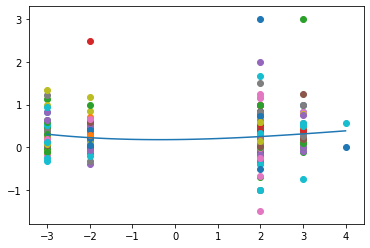

In [63]:
sentiment_directory = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/Sentiment/"
analyzed_users = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/data_analyzed_1.p"

already_analyzed = pickle.load(open(analyzed_users, "rb"))
list_of_users = []

for uid in already_analyzed:
    list_of_users.append(uid)
    
x_array = []
y_array = []

#exclude = [0]
exclude = [-1, 0, 1]

# Analyze all the  users in initial_tweets
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if tweet_sentiment[tweet_id]['combined'] not in exclude:
                if 'friend' in tweet_sentiment[tweet_id]:
                    x_array.append(tweet_sentiment[tweet_id]['combined'])
                    y_array.append(tweet_sentiment[tweet_id]['friend'])
                    plt.scatter(tweet_sentiment[tweet_id]['combined'], tweet_sentiment[tweet_id]['friend'])
            
x_array = np.array(x_array)
y_array = np.array(y_array)

mymodel = np.poly1d(np.polyfit(x_array, y_array, 3))
myline = np.linspace(-3, 4, 100)
plt.plot(myline, mymodel(myline))

Extra Code